In [1]:
# %config InlineBackend.figure_formats = ['svg']

In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [3]:
import seaborn_figure_settings

In [4]:
save_dpath = os.path.join('../notebooks/figures/', 'reruns')
os.makedirs(save_dpath,exist_ok=True)

In [5]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [7]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#84dcc6', '#426b69', '#9b7874', '#b191ff', ]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.5176470588235295, 0.8627450980392157, 0.7764705882352941),
 (0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0)]

In [8]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vorder1 = ['Versatile VPRO','Non-Versatile VPRO',  ]
vorder1_labels = ['Versatile vPro','Non-Versatile vPro',  ]

vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    #'#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Non-Versatile VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [9]:
cmap = {
    'Original' : 'Original\nvPro: 12.5 fg N/cell', 
    'rerun_het_BP05' : 'vPro: 7 fg N/cell', 
    'rerun_het_BP14' : 'vPro: 20 fg N/cell', 
    'rerun_het_CP13' : 'vPro init C:N: 8',
    'rerun_het_DIN800' : 'DIN=800 µM N', 
    'rerun_het_DOC160' : 'DOC=160 µM C',
}
corder = ['Original\nvPro: 12.5 fg N/cell', 'vPro: 7 fg N/cell',
       'vPro: 20 fg N/cell', 'vPro init C:N: 8', 'DIN=800 µM N',
       'DOC=160 µM C']
#count_init_df.Category.unique()


In [10]:
morder

['MIXOTROPH', 'OVERFLOW', 'EXOENZYME', 'ROS']

In [11]:
import os
import glob
dpath = '../results/rerun_sensitivity/'
dpath2 = '../results/final/het/'

#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [12]:
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    df['Phase'] = category
    return df
vpro_orig_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath2, 'versatile_vpros_*'))], ignore_index=True)


../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-EXOENZYME.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW.csv extend
../results/final/het/versatile_vpros_monte_add_het_clean.csv add
../results/final/het/versatile_vpros_monte_het_multi.csv init
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME.csv extend
../results/final/het/versatile_vpros_monte_het_add_100per_vpro_OVERFLOW.csv add
../results/final/het/versatile_vpros_monte_het_extend_MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-ROS.csv extend
../results/final/het/versatile_vpros_monte_het_extend_ROS-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_MIN.csv extend
../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-ROS-MIXOTROPH.csv extend
../results/final/het/versatile_v

In [13]:
vpro_orig_df.VPRO = vpro_orig_df.VPRO.str.replace('_monte_', '' ,regex=False)

In [16]:
vpro_orig_df = vpro_orig_df.groupby(['model', 'Phase', 'VPRO', ]).sum().reset_index()
vpro_orig_df['Versatile'] = vpro_orig_df.pos_interaction.ge(1) & vpro_orig_df.neg_interaction.ge(1)
vpro_orig_df['simulations_per_VPRO']  = vpro_orig_df[gorder].sum(axis=1)
vpro_orig_df['Versatile_STR'] = vpro_orig_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })

In [17]:
vpro_orig_df = vpro_orig_df.loc[vpro_orig_df.model.isin(morder) & vpro_orig_df.Phase.isin(['init', 'extend'])].reset_index(drop=True)

In [18]:
vpro_orig_df['category'] = 'Original'

In [19]:
predicted_classes_df.head()

NameError: name 'predicted_classes_df' is not defined

In [92]:
predicted_classes_df['Phase'].value_counts()


Phase
extend    722410
init       89134
Name: count, dtype: int64

In [93]:
predicted_classes_df[['category', 'Phase']].value_counts()


category          Phase 
rerun_het_BP05    extend    145550
rerun_het_CP13    extend    145199
rerun_het_BP14    extend    145179
rerun_het_DIN800  extend    143484
rerun_het_DOC160  extend    142998
rerun_het_CP13    init       17918
rerun_het_BP14    init       17886
rerun_het_BP05    init       17820
rerun_het_DIN800  init       17757
rerun_het_DOC160  init       17753
Name: count, dtype: int64

In [94]:
predicted_classes_df.VPRO = predicted_classes_df.VPRO.str.replace('_monte_', '' ,regex=False)


In [95]:
def find_versatile_vpros(df_predicted_classes):
    vpro_df = df_predicted_classes.pivot_table(
        columns = 'y_pred',
        index=['model', 'VPRO', 'category', 'Phase'],
        values='run_id', 
        aggfunc='count', fill_value=0,
    )

    poscolumns = [c for c in ['Strong','Sustained'] if c in vpro_df.columns]
    negcolumns = [c for c in ['Inhibited','Weak'] if c in vpro_df.columns]
    if poscolumns:
        vpro_df['pos_interaction'] = vpro_df[poscolumns].sum(axis=1) 
    else:
        vpro_df['pos_interaction'] = 0

    if negcolumns:
        vpro_df['neg_interaction'] = vpro_df[negcolumns].sum(axis=1)
    else:
        vpro_df['neg_interaction'] = 0
                 
    vpro_df['Versatile'] = vpro_df['pos_interaction'].ge(1) & vpro_df['neg_interaction'].ge(1) 
    vpro_df = vpro_df.reset_index()

    return vpro_df


In [96]:
vpro_df = find_versatile_vpros(predicted_classes_df)

In [97]:
vpro_df

y_pred,model,VPRO,category,Phase,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile
0,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_BP05,init,0,35,4,0,67,60,67,60,True
1,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_BP14,init,0,4,13,0,60,90,60,90,True
2,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_CP13,init,0,19,10,0,61,76,61,76,True
3,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_DIN800,init,0,39,48,79,1,0,80,0,False
4,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_DOC160,init,0,19,6,0,62,79,62,79,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18110,ROS,vpro_97_23_ROS_C1,rerun_het_BP05,init,0,0,0,0,0,55,0,55,False
18111,ROS,vpro_97_23_ROS_C1,rerun_het_BP14,init,0,0,0,0,0,55,0,55,False
18112,ROS,vpro_97_23_ROS_C1,rerun_het_CP13,init,0,0,0,0,0,55,0,55,False
18113,ROS,vpro_97_23_ROS_C1,rerun_het_DIN800,init,0,5,0,0,9,40,9,40,True


In [98]:
vpro_df['Versatile'] = vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1)

In [99]:
vpro_df['simulations_per_VPRO']  = vpro_df[gorder].sum(axis=1)

In [100]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })
#vpro_df.loc[vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Positive VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'



In [166]:
vpro_df['Category'] = vpro_df.category.map(cmap)

In [101]:
vorder = ['Versatile VPRO','Non-Versatile VPRO',  ]
vpalette = [ '#FF8E8F', '#9c110b']
vpalette = [ 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

In [102]:
vpro_df = vpro_df.loc[vpro_df.model.isin(morder)]
vpro_df = pd.concat([vpro_df, vpro_orig_df], ignore_index=True)

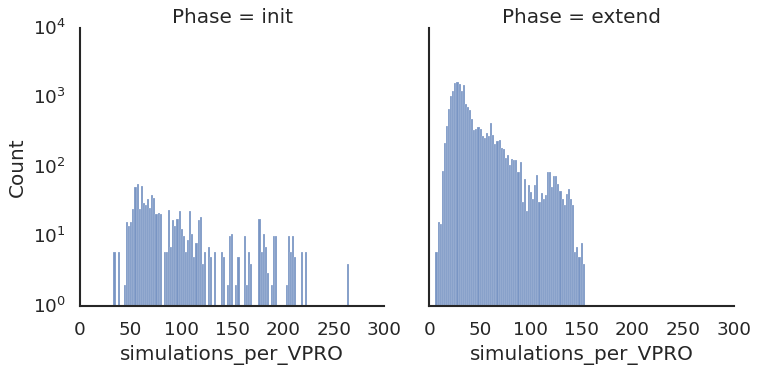

In [103]:
sns.set_context('talk')
sns.displot(
    data=vpro_df,
    col='Phase', 
    x='simulations_per_VPRO',
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False),
).set(yscale='log')

In [104]:
vpro_df.groupby('Versatile_STR').simulations_per_VPRO.describe().T

Versatile_STR,Non-Versatile VPRO,Versatile VPRO
count,19361.000000,2107.000000
mean,40.774185,86.869957
std,24.192843,36.600318
min,4.000000,13.000000
25%,26.000000,60.000000
50%,32.000000,75.000000
75%,47.000000,114.000000
max,264.000000,265.000000


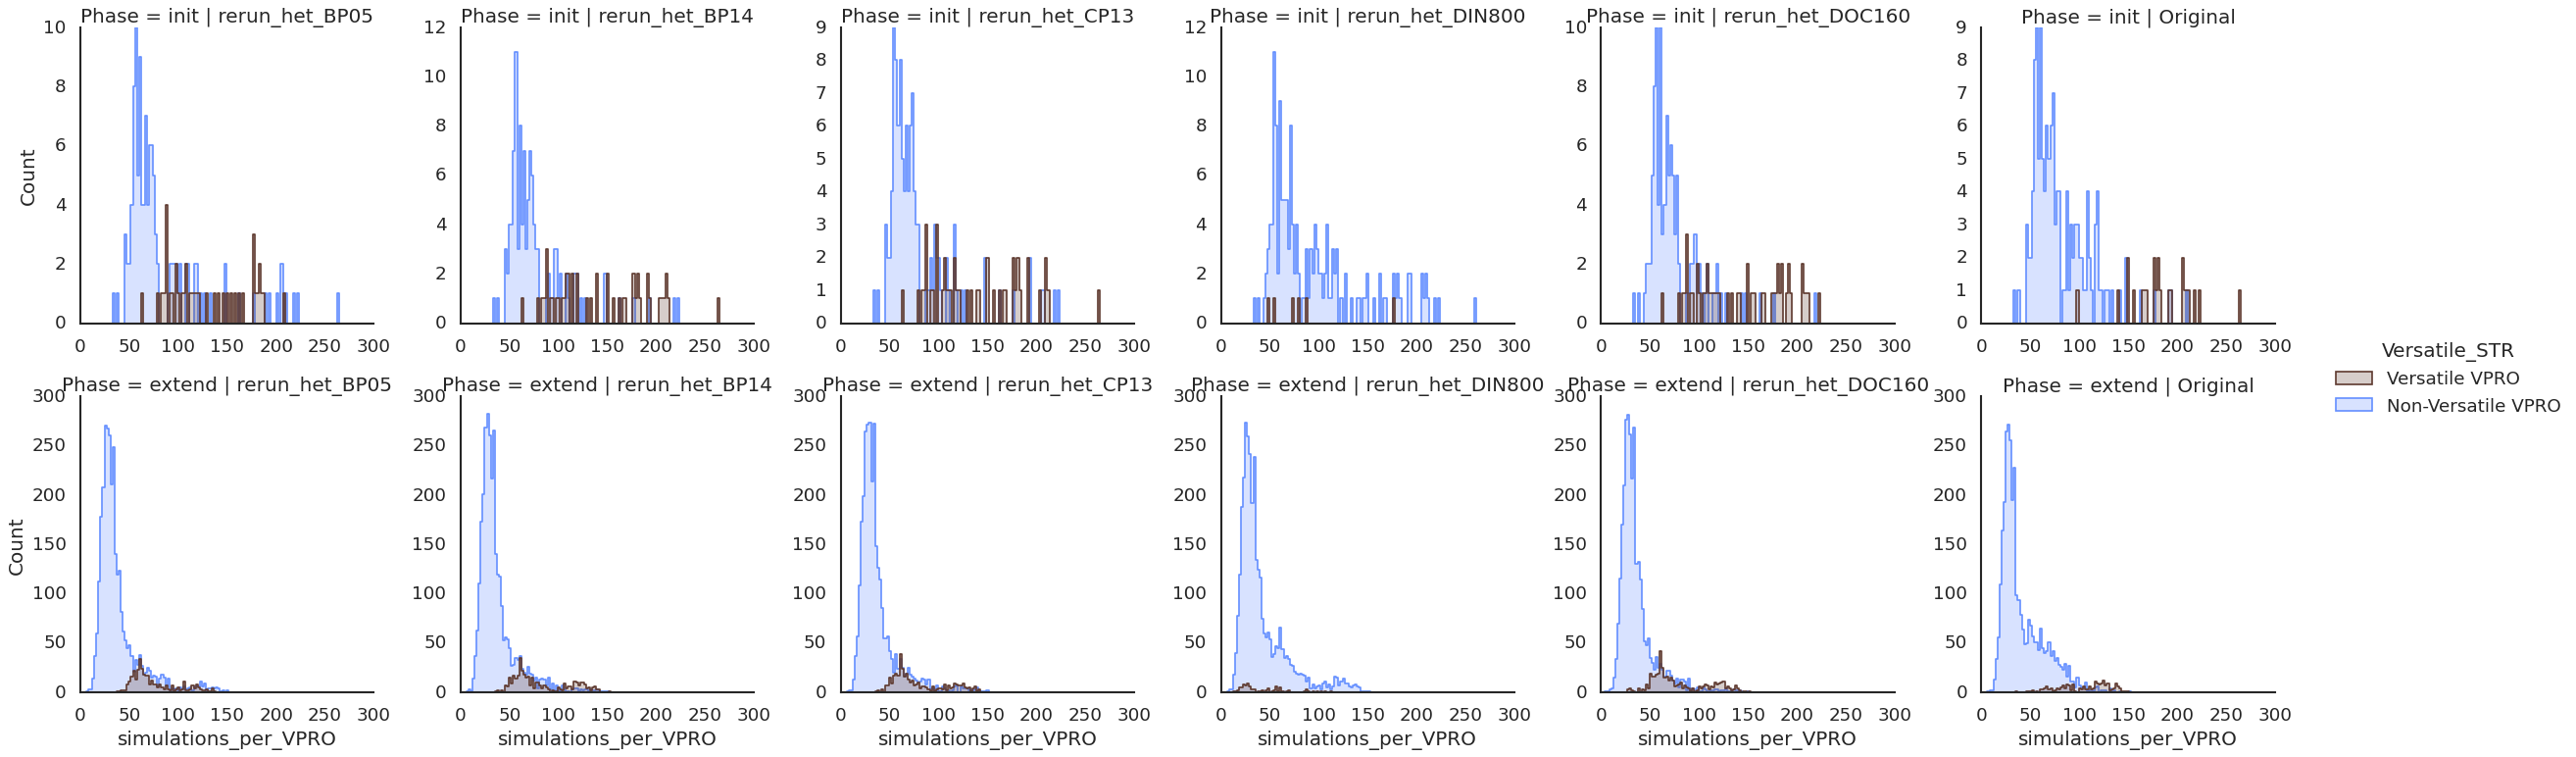

In [106]:
sns.set_context('talk')
g = sns.displot(
    data=vpro_df,
    col='category', #row_order=['init', 'extend', ],
    row='Phase', row_order=['init', 'extend', ],
    hue='Versatile_STR', palette=vpalette1, hue_order=vorder1,
    x='simulations_per_VPRO', #multiple='stack',
    element='step', #fill=False,
    
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False, sharey=False),
)#.set(yscale='log').
g.set_titles(col_template='{col_name}')

In [107]:
count_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend']) & vpro_df.model.isin(morder)].groupby(['category', 'model'])[gorder].sum().reset_index()

count_df

,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,Original,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0
1,Original,MIXOTROPH,0.0,12.0,56,21119,15344,179.0
2,Original,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0
3,Original,ROS,547.0,19.0,17,17424,3634,1030.0
4,rerun_het_BP05,EXOENZYME,563.0,9531.0,459,6303,29091,4407.0
5,rerun_het_BP05,MIXOTROPH,0.0,25.0,2054,14688,19406,123.0
6,rerun_het_BP05,OVERFLOW,73.0,1395.0,1523,17144,30835,1122.0
7,rerun_het_BP05,ROS,600.0,81.0,335,14745,5888,866.0
8,rerun_het_BP14,EXOENZYME,1128.0,7242.0,0,13055,20332,9032.0
9,rerun_het_BP14,MIXOTROPH,0.0,3.0,25,24503,11656,246.0


In [108]:
count_init_df = vpro_df.loc[vpro_df.Phase.isin(['init'])& vpro_df.model.isin(morder)].groupby(['category', 'model'])[gorder].sum().reset_index()

count_init_df

,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,Original,EXOENZYME,35.0,1741.0,1,1011,2623,902.0
1,Original,MIXOTROPH,0.0,0.0,0,1335,1058,0.0
2,Original,OVERFLOW,5.0,182.0,14,1852,2656,192.0
3,Original,ROS,190.0,11.0,1,1561,281,172.0
4,rerun_het_BP05,EXOENZYME,34.0,1827.0,46,658,3108,560.0
5,rerun_het_BP05,MIXOTROPH,0.0,0.0,164,978,1234,0.0
6,rerun_het_BP05,OVERFLOW,3.0,212.0,315,1010,3251,102.0
7,rerun_het_BP05,ROS,196.0,28.0,19,1252,569,141.0
8,rerun_het_BP14,EXOENZYME,113.0,1552.0,0,1284,2113,1246.0
9,rerun_het_BP14,MIXOTROPH,0.0,0.0,0,1520,854,0.0


In [109]:
count_ver_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend']) & vpro_df.Versatile].groupby(['model', 'category'])[gorder].sum().reset_index()
count_ver_df



,model,category,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,EXOENZYME,Original,458.0,6907.0,0,2414,6327,4266.0
1,EXOENZYME,rerun_het_BP05,2.0,4355.0,150,2101,4825,1148.0
2,EXOENZYME,rerun_het_BP14,385.0,5895.0,0,3567,4746,4604.0
3,EXOENZYME,rerun_het_CP13,54.0,5692.0,2,3091,5228,3118.0
4,EXOENZYME,rerun_het_DIN800,442.0,0.0,0,32,184,296.0
5,EXOENZYME,rerun_het_DOC160,185.0,7174.0,9,3710,6456,3675.0
6,MIXOTROPH,Original,0.0,12.0,0,56,162,84.0
7,MIXOTROPH,rerun_het_BP05,0.0,22.0,0,21,166,83.0
8,MIXOTROPH,rerun_het_BP14,0.0,3.0,0,37,46,54.0
9,MIXOTROPH,rerun_het_CP13,0.0,10.0,0,58,156,90.0


In [110]:
count_ver_init_df = vpro_df.loc[vpro_df.Phase.isin(['init', ]) & vpro_df.Versatile].groupby(['category','model'])[gorder].sum().reset_index()
count_ver_init_df



,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,Original,EXOENZYME,35.0,1469.0,0,581,1175,781.0
1,Original,OVERFLOW,0.0,11.0,0,17,66,5.0
2,Original,ROS,190.0,11.0,0,1,2,61.0
3,rerun_het_BP05,EXOENZYME,0.0,1072.0,46,353,1160,282.0
4,rerun_het_BP05,OVERFLOW,2.0,185.0,149,518,1520,57.0
5,rerun_het_BP14,EXOENZYME,76.0,1304.0,0,795,908,917.0
6,rerun_het_BP14,OVERFLOW,7.0,152.0,0,1217,912,194.0
7,rerun_het_BP14,ROS,181.0,0.0,0,3,2,78.0
8,rerun_het_CP13,EXOENZYME,7.0,1164.0,0,615,975,629.0
9,rerun_het_CP13,OVERFLOW,5.0,174.0,0,962,1287,158.0


In [111]:
count_init_df.loc[count_init_df.model.isin(morder)].groupby('model')[gorder].sum().sum(axis=1)

model
EXOENZYME    37709.0
MIXOTROPH    14220.0
OVERFLOW     29331.0
ROS          13138.0
dtype: float64

In [112]:
sns.set_context('paper')

In [115]:
vcount_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend'])
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [116]:
vcount_df = vcount_df.reindex(columns=vorder1)
vcount_df = vcount_df.sort_values(by=vorder1,ascending=False)

In [117]:
vcount1_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [118]:
vcount1_init_df = vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [119]:
vpro_df.columns

Index(['model', 'VPRO', 'category', 'Phase', 'Inhibited', 'Neutral', 'Other',
       'Strong', 'Sustained', 'Weak', 'pos_interaction', 'neg_interaction',
       'Versatile', 'simulations_per_VPRO', 'Versatile_STR'],
      dtype='object')

In [120]:
vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

Versatile_STR,Non-Versatile VPRO,Versatile VPRO
model,,
EXOENZYME,154,104
MIXOTROPH,210,0
OVERFLOW,227,103
ROS,174,6


In [121]:
vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

model      Versatile_STR 
EXOENZYME  Versatile VPRO     728
MIXOTROPH  Versatile VPRO      25
OVERFLOW   Versatile VPRO    1248
ROS        Versatile VPRO     106
dtype: int64

In [122]:
vpro_df.loc[
        vpro_df.Phase.isin(['init',]) &
        vpro_df.model.isin(morder)&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

model      Versatile_STR 
EXOENZYME  Versatile VPRO    104
OVERFLOW   Versatile VPRO    103
ROS        Versatile VPRO      6
dtype: int64

In [123]:
t= vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)
        
].groupby(['model'])[['simulations_per_VPRO', 'pos_interaction', 'neg_interaction', 'Neutral', 'Weak']].sum()
t['% pos'] = t['pos_interaction'] / t['simulations_per_VPRO'] 
t['% neg'] = t['neg_interaction'] / t['simulations_per_VPRO'] 
t['% neutral'] = t['Neutral'] / t['simulations_per_VPRO'] 
t['% Weak'] = t['Weak'] / t['simulations_per_VPRO'] 
t['% Weak/neutral'] = (t['Weak'] + t['Neutral']) / t['simulations_per_VPRO'] 

t

,simulations_per_VPRO,pos_interaction,neg_interaction,Neutral,Weak,% pos,% neg,% neutral,% Weak,% Weak/neutral
model,,,,,,,,,,
EXOENZYME,303546.0,65896,52500,135887,52012,0.217087,0.172956,0.447665,0.171348,0.619013
MIXOTROPH,217683.0,1800,110063,100839,107165,0.008269,0.505611,0.463238,0.492298,0.955536
OVERFLOW,316911.0,14275,134243,144371,132349,0.045044,0.423598,0.455557,0.417622,0.873179
ROS,134324.0,4953,90451,31972,89781,0.036874,0.673379,0.238022,0.668391,0.906413


In [124]:
vcount1_df = vcount1_df.reindex(columns=vorder1, index=morder)
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [125]:
vcount1_init_df = vcount1_init_df.reindex(columns=vorder1, index=morder)
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [126]:
sns.set_context('poster')

In [127]:
vcount1_df.columns.name = None
vcount1_df.columns

Index(['Versatile VPRO', 'Non-Versatile VPRO'], dtype='object')

In [128]:
vcount1_init_df.columns.name = None
vcount1_init_df.columns

Index(['Versatile VPRO', 'Non-Versatile VPRO'], dtype='object')

In [129]:
count_init_df

,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,Original,EXOENZYME,35.0,1741.0,1,1011,2623,902.0
1,Original,MIXOTROPH,0.0,0.0,0,1335,1058,0.0
2,Original,OVERFLOW,5.0,182.0,14,1852,2656,192.0
3,Original,ROS,190.0,11.0,1,1561,281,172.0
4,rerun_het_BP05,EXOENZYME,34.0,1827.0,46,658,3108,560.0
5,rerun_het_BP05,MIXOTROPH,0.0,0.0,164,978,1234,0.0
6,rerun_het_BP05,OVERFLOW,3.0,212.0,315,1010,3251,102.0
7,rerun_het_BP05,ROS,196.0,28.0,19,1252,569,141.0
8,rerun_het_BP14,EXOENZYME,113.0,1552.0,0,1284,2113,1246.0
9,rerun_het_BP14,MIXOTROPH,0.0,0.0,0,1520,854,0.0


In [130]:
print(vcount1_df.sum(axis=1))


model
MIXOTROPH    7434
OVERFLOW     5820
EXOENZYME    3846
ROS          4368
dtype: int64


In [131]:
print(vcount1_init_df.sum(axis=1))


model
MIXOTROPH    210
OVERFLOW     330
EXOENZYME    258
ROS          180
dtype: int64


In [132]:
vcount1_df = vcount1_df.div(vcount1_df.sum(axis=1), axis=0) * 100


In [133]:
vcount1_init_df = vcount1_init_df.div(vcount1_init_df.sum(axis=1), axis=0) * 100


In [134]:
vcount1_init_df

,Versatile VPRO,Non-Versatile VPRO
model,,
MIXOTROPH,0.000000,100.000000
OVERFLOW,31.212121,68.787879
EXOENZYME,40.310078,59.689922
ROS,3.333333,96.666667


In [136]:
vpro_df['% positive'] = vpro_df.pos_interaction / vpro_df.simulations_per_VPRO

In [137]:
vpro_df.loc[vpro_df.Versatile & vpro_df.model.isin(morder) & vpro_df.Phase.isin(['init', 'extend'])].groupby('model')['% positive'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
EXOENZYME,728.0,0.331346,0.163901,0.008621,0.291705,0.392000,0.442084,0.575540
MIXOTROPH,25.0,0.066798,0.088982,0.011628,0.014706,0.029412,0.077778,0.392857
OVERFLOW,1248.0,0.058237,0.041526,0.008547,0.031250,0.050000,0.075758,0.434783
ROS,106.0,0.272173,0.218796,0.033333,0.087945,0.207615,0.353197,0.758491


In [138]:
cdf

y_pred,Strong,Sustained,Inhibited,Weak,Neutral,Other
rerun_het_BP05/EXOENZYME,0.545484,29.311728,0.738007,10.556714,49.863629,8.984438
rerun_het_BP05/MIXOTROPH,0.000000,0.000000,6.902357,41.161616,51.936027,0.000000
rerun_het_BP05/OVERFLOW,0.061312,4.332720,6.437768,20.641733,66.441856,2.084611
rerun_het_BP05/ROS,8.888889,1.269841,0.861678,56.780045,25.804989,6.394558
rerun_het_BP14/EXOENZYME,1.791376,24.603678,0.000000,20.355105,33.497146,19.752695
rerun_het_BP14/MIXOTROPH,0.000000,0.000000,0.000000,64.026959,35.973041,0.000000
rerun_het_BP14/OVERFLOW,0.143296,3.111566,0.000000,51.218014,40.388946,5.138178
rerun_het_BP14/ROS,8.216069,0.000000,0.000000,75.941897,7.126645,8.715388
rerun_het_CP13/EXOENZYME,0.935617,26.815731,0.000000,16.286077,41.024421,14.938154
rerun_het_CP13/MIXOTROPH,0.000000,0.000000,0.000000,56.543624,43.456376,0.000000


In [163]:
count_init_df['Category'] = count_init_df.category.map({
    'Original' : 'Original\nvPro: 12.5 fg N/cell', 
    'rerun_het_BP05' : 'vPro: 7 fg N/cell', 
    'rerun_het_BP14' : 'vPro: 20 fg N/cell', 
    'rerun_het_CP13' : 'vPro init C:N: 8',
    'rerun_het_DIN800' : 'DIN=800 µM N', 
    'rerun_het_DOC160' : 'DOC=160 µM C',
})
corder = ['Original\nvPro: 12.5 fg N/cell', 'vPro: 7 fg N/cell',
       'vPro: 20 fg N/cell', 'vPro init C:N: 8', 'DIN=800 µM N',
       'DOC=160 µM C']
#count_init_df.Category.unique()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'EXOENZYME'),
  Text(1, 0, 'MIXOTROPH'),
  Text(2, 0, 'OVERFLOW'),
  Text(3, 0, 'ROS')])

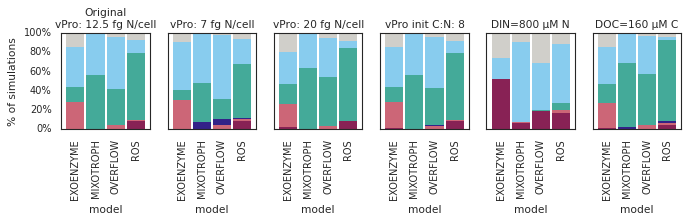

In [164]:
sns.set_context('paper')

fig, axes = plt.subplots(1,6, figsize=(10,1.5), sharex=True , sharey=True)
for cat, ax in zip(corder, axes):

    #cdf = count_df.copy()
    tdf = count_init_df.loc[count_init_df.Category.isin([cat])]
    cdf = tdf[gorder].div(tdf[gorder].sum(axis=1), axis=0) * 100
    
    cdf.index=tdf.model 
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=0.9, #figsize=(3,3),
        rot=90, lw=0.01, 
        ylabel='% of simulations', title=cat, legend=False,
        #title='Breakdown of Simulations per Phenotype',
        ax=ax
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

In [159]:
count_df

,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,Original,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0
1,Original,MIXOTROPH,0.0,12.0,56,21119,15344,179.0
2,Original,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0
3,Original,ROS,547.0,19.0,17,17424,3634,1030.0
4,rerun_het_BP05,EXOENZYME,563.0,9531.0,459,6303,29091,4407.0
5,rerun_het_BP05,MIXOTROPH,0.0,25.0,2054,14688,19406,123.0
6,rerun_het_BP05,OVERFLOW,73.0,1395.0,1523,17144,30835,1122.0
7,rerun_het_BP05,ROS,600.0,81.0,335,14745,5888,866.0
8,rerun_het_BP14,EXOENZYME,1128.0,7242.0,0,13055,20332,9032.0
9,rerun_het_BP14,MIXOTROPH,0.0,3.0,25,24503,11656,246.0


In [71]:
sns.set_context('paper')

In [78]:
vcount1_init_df.index.name = 'model'
cdfi = count_init_df.loc[count_init_df['model'].isin(morder)].copy()
cdfi.index=cdfi.model
cdfi = cdfi.reindex(index=reversed(morder))
cdfi = cdfi[gorder].div(cdfi[gorder].sum(axis=1), axis=0) * 100

cdfvi = count_ver_init_df.loc[count_ver_init_df['model'].isin(morder)].copy()
cdfvi.index=cdfvi.model
cdfvi = cdfvi.reindex(index=reversed(morder))
cdfvi = cdfvi[gorder].div(cdfvi[gorder].sum(axis=1), axis=0) * 100

vcount1_init_df['analysis'] = 'vPros'
cdfvi['analysis'] = 'Versatile'
cdfi['analysis'] = 'All'

newcdfi = pd.concat([cdfi,cdfvi,  vcount1_init_df, ]).reset_index().fillna(0)

newcdfi

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,8.574007,0.496390,0.045126,70.442238,12.680505,7.761733,All,0.000000,0.000000
1,EXOENZYME,0.554412,27.578014,0.015840,16.014573,41.549184,14.287977,All,0.000000,0.000000
2,OVERFLOW,0.102020,3.713528,0.285656,37.788206,54.193022,3.917568,All,0.000000,0.000000
3,MIXOTROPH,0.000000,0.000000,0.000000,55.787714,44.212286,0.000000,All,0.000000,0.000000
4,ROS,71.698113,4.150943,0.000000,0.377358,0.754717,23.018868,Versatile,0.000000,0.000000
5,EXOENZYME,0.029446,35.129564,0.029446,17.815077,29.358068,17.638398,Versatile,0.000000,0.000000
6,OVERFLOW,0.193125,7.029741,0.000000,36.307455,50.675937,5.793743,Versatile,0.000000,0.000000
7,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Versatile,0.000000,0.000000
8,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,0.000000,100.000000
9,OVERFLOW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,45.454545,54.545455


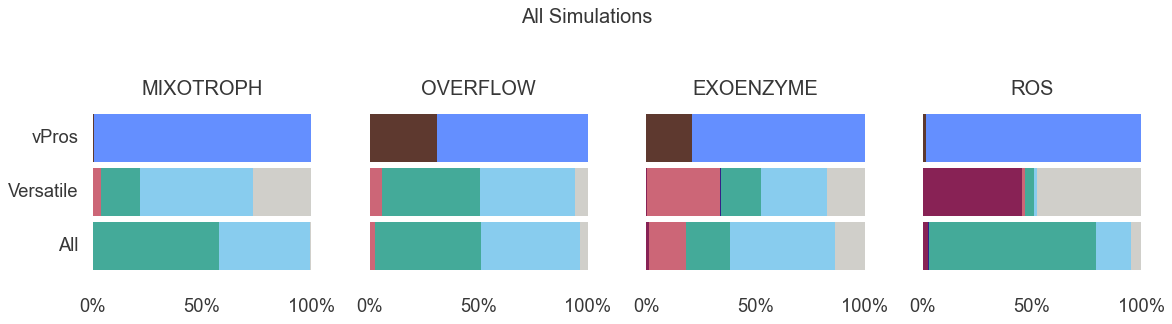

In [79]:
sns.set_context('talk')
fig, axes = plt.subplots(1,4, figsize=(15,4), sharex=True , sharey=True)
for ax,m in zip(axes,morder):
    t = newcdf.loc[newcdf.model.isin([m])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('All Simulations', y=1.03)
plt.tight_layout()
plt.show()


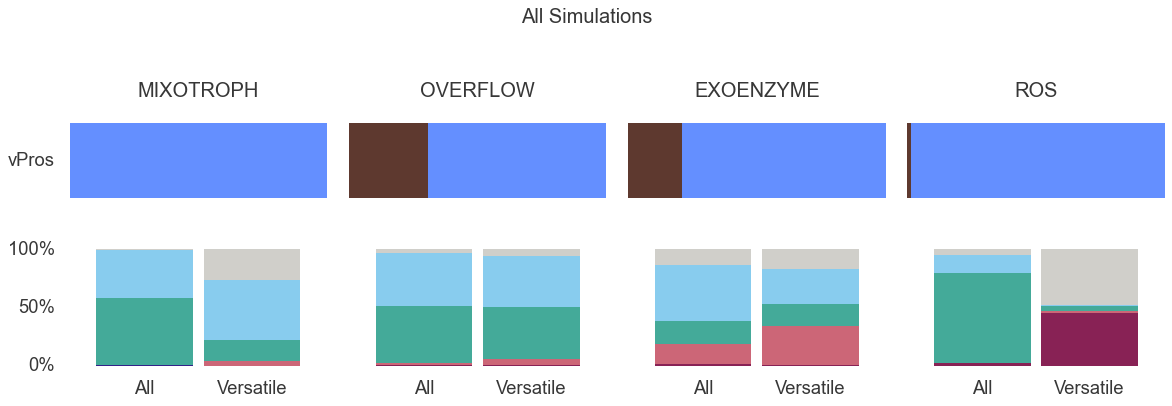

In [80]:
sns.set_context('talk')
fig, axes = plt.subplots(2,4, figsize=(15,5), sharex='row' , sharey='row')
for idx,m in enumerate(morder):
    ax=axes[0,idx]
    t = newcdf.loc[newcdf.model.isin([m]) & newcdf.analysis.isin(['vPros'])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, #xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax=axes[1,idx]
    t = newcdf.loc[newcdf.model.isin([m]) & ~newcdf.analysis.isin(['vPros'])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title='',ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, yticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('All Simulations', y=1.03)
plt.tight_layout()
plt.show()


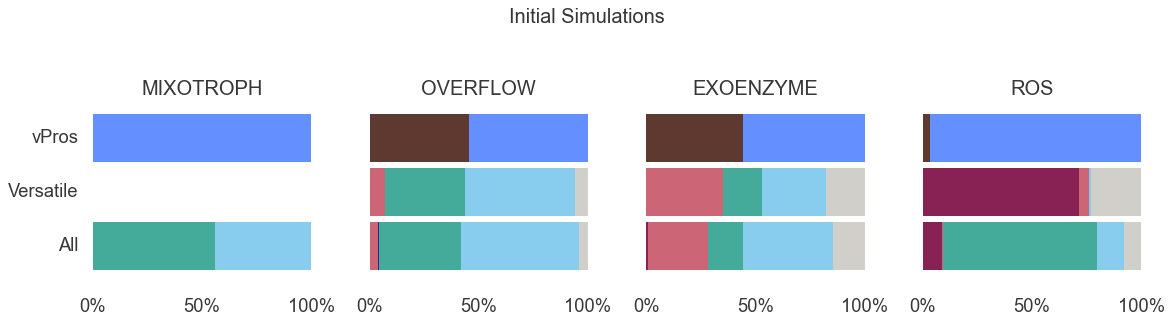

In [81]:
sns.set_context('talk')
fig, axes = plt.subplots(1,4, figsize=(15,4), sharex=True , sharey=True)
for ax,m in zip(axes,morder):
    t = newcdfi.loc[newcdfi.model.isin([m])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('Initial Simulations', y=1.03)
plt.tight_layout()
plt.show()


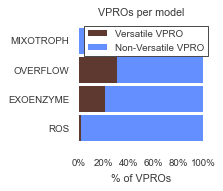

In [82]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder))

vcount1_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), #legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


In [83]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis
model,,,,,,,
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All


In [84]:
count_ver_df.loc[count_ver_df.model.isin(morder)].groupby('model')[gorder].sum().sum(axis=1)


model
EXOENZYME    16813.0
MIXOTROPH      314.0
OVERFLOW     23598.0
ROS           1191.0
dtype: float64

In [85]:
count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,True,True,False,False


In [86]:
count_ver_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,37.0,5675.0,4,3131,5080,2886.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,3.0,2672.0,286,1620,4975,2263.0,EM,True,False,True,False
2,EXOENZYME-ROS,252.0,10188.0,7,4859,6417,4757.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,269.0,13140.0,4,7174,7837,7901.0,ERM,True,False,True,True
4,MIXOTROPH,0.0,12.0,0,56,162,84.0,M,True,False,False,False
5,OVERFLOW,78.0,1263.0,2,10620,10246,1389.0,O,False,True,False,False
6,OVERFLOW-EXOENZYME,25.0,13098.0,2,5088,11199,4865.0,EO,False,True,True,False
7,OVERFLOW-EXOENZYME-MIXOTROPH,5.0,12317.0,259,5035,9789,4462.0,EOM,True,True,True,False
8,OVERFLOW-MIXOTROPH,30.0,2361.0,102,10526,14212,1958.0,OM,True,True,False,False
9,OVERFLOW-ROS,711.0,1775.0,8,13444,7964,5019.0,OR,False,True,False,True


In [87]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis
model,,,,,,,
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All


In [88]:
vcount_df

Versatile_STR,Versatile VPRO,Non-Versatile VPRO
MODEL,,
ERM,390,1087
OM,379,1283
EORM,347,920
OR,325,745
O,300,670
ORM,297,1073
EOR,292,734
EOM,284,1156
EO,279,857


In [89]:
vcount1_df

,Versatile VPRO,Non-Versatile VPRO,analysis
ROS,1.510989,98.489011,vPros
EXOENZYME,21.060842,78.939158,vPros
OVERFLOW,30.927835,69.072165,vPros
MIXOTROPH,0.322841,99.677159,vPros


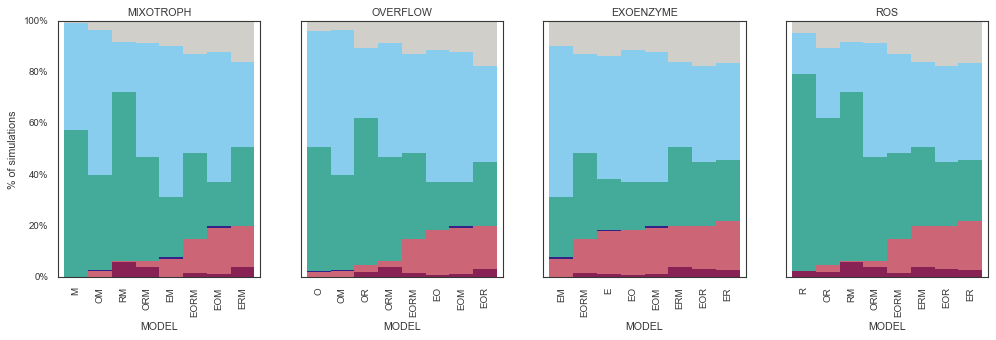

In [90]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder, axes):
    
    cdf = count_df.loc[count_df[m]].copy()
    
    cdf.index=cdf.MODEL
    cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
    cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
    cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
    cdf = cdf.sort_values(by=['pos', 'neg',])
    #cdf = cdf/ cdf[gorder].sum(axis=1)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% of simulations'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [91]:
vorder

['Versatile VPRO', 'Non-Versatile VPRO']

In [92]:
vpro_df['Versatile_STR_'] = pd.Categorical(vpro_df['Versatile_STR'], categories=reversed(vorder), ordered=True)

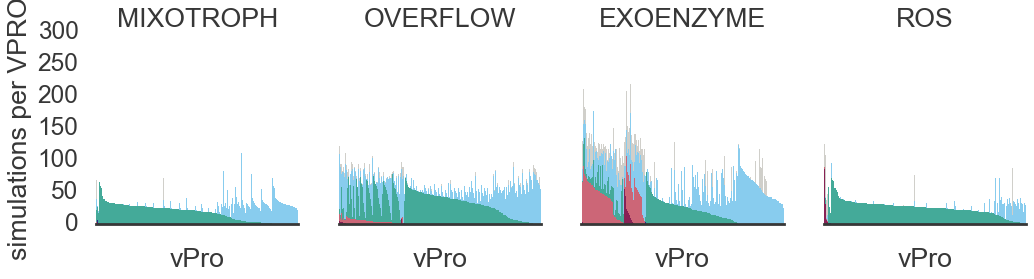

In [93]:
sns.set_context('poster')
fig, axes = plt.subplots(1,4, figsize=(15,3), sharey=True)# , sharey=True)
for i1,m1 in enumerate(morder):
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init','extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=axes[i1],) #fontsize=50)
        axes[i1].set(xticklabels=[], ylabel='simulations per VPRO', xlabel='vPro'
                    )
        axes[i1].set(title=m1)
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
sns.despine(left=True)

In [94]:
newcdfi

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,8.574007,0.496390,0.045126,70.442238,12.680505,7.761733,All,0.000000,0.000000
1,EXOENZYME,0.554412,27.578014,0.015840,16.014573,41.549184,14.287977,All,0.000000,0.000000
2,OVERFLOW,0.102020,3.713528,0.285656,37.788206,54.193022,3.917568,All,0.000000,0.000000
3,MIXOTROPH,0.000000,0.000000,0.000000,55.787714,44.212286,0.000000,All,0.000000,0.000000
4,ROS,71.698113,4.150943,0.000000,0.377358,0.754717,23.018868,Versatile,0.000000,0.000000
5,EXOENZYME,0.029446,35.129564,0.029446,17.815077,29.358068,17.638398,Versatile,0.000000,0.000000
6,OVERFLOW,0.193125,7.029741,0.000000,36.307455,50.675937,5.793743,Versatile,0.000000,0.000000
7,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Versatile,0.000000,0.000000
8,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,0.000000,100.000000
9,OVERFLOW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,45.454545,54.545455


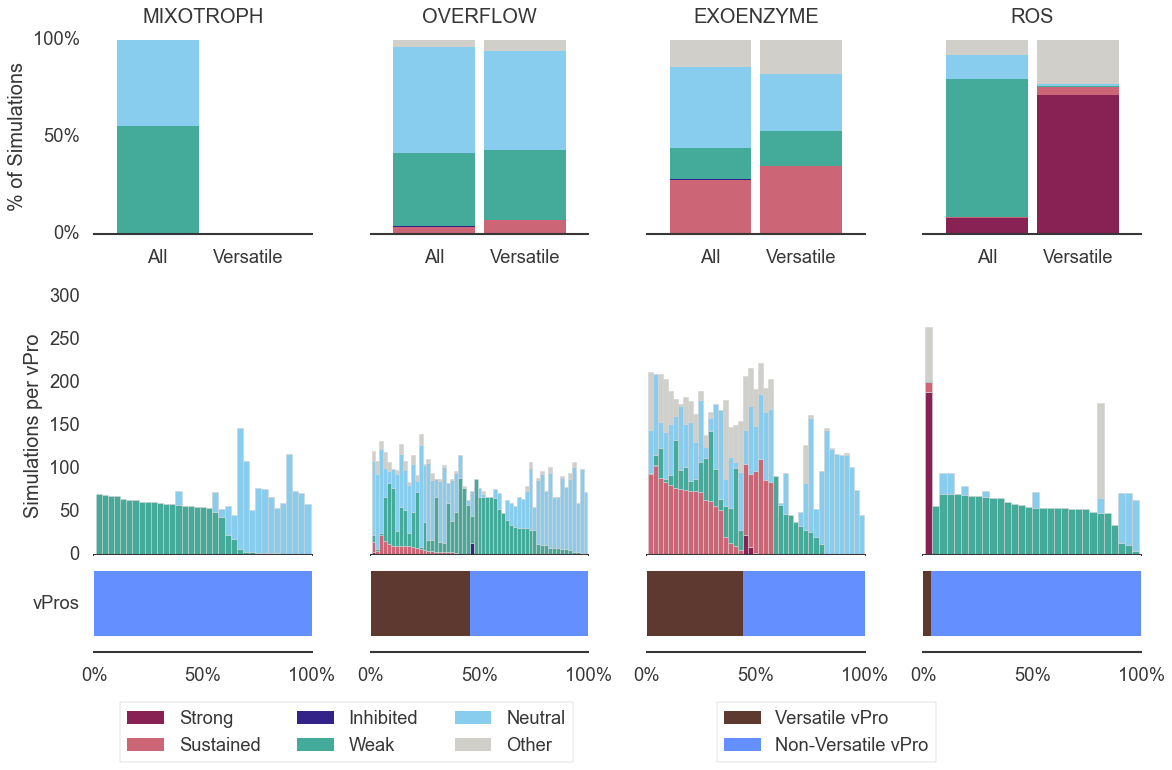

In [95]:
sns.set_context('talk')
fig, axes = plt.subplots(3,4, figsize=(15,9), sharey='row', sharex=False, height_ratios=[2,2, 1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[1,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0.5, edgecolor='#D3D3D3', rasterized=True,
               ax=ax,) #fontsize=50)
        ax.xaxis.tick_top()
        ax.set(xticks=[], ylabel='Simulations per vPro', xlabel=''
                    )
        #ax.spines.bottom.set_visible(False) 
        #ax.axis["top"].set_visible(False)
        ax = axes[2,i1]

        t = newcdfi.loc[newcdfi.model.isin([m1]) & newcdfi.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=1,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        ax = axes[0,i1]
        t = newcdfi.loc[newcdfi.model.isin([m1]) & ~newcdfi.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', 
            # figsize=(2,2), 
            legend=False, ax=ax, yticks=(0,50,100,), ylabel='% of Simulations'
        )
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.set(title=m1)
        ax.set_title(m1, pad=15)
#axes[0,0].set()
#axes[2,1].set_title('Simulation Outcomes')
#axes[2,1].legend(bbox_to_anchor=(0.55, -0.04),ncols=3, )


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend_dict = dict(zip(labels, lines))
lines_g = [legend_dict[c] for c in gorder]
lines_v = [legend_dict[c] for c in vorder1]


sns.despine()
    
leg1 = fig.legend(lines_g, gorder, loc='lower center', ncol=3  ,  bbox_to_anchor=(0.3, -0.09))# , frameon=False)
leg2 = fig.legend(lines_v, vorder1_labels, loc='lower center', ncol=1  ,  bbox_to_anchor=(0.7, -0.09))# , frameon=False)
leg1.get_frame().set_linewidth(0.2)
leg2.get_frame().set_linewidth(0.2)
leg1.get_frame().set_edgecolor("grey")
leg2.get_frame().set_edgecolor("grey")

plt.tight_layout()
for i in range(len(morder)):
    bbox0 = axes[1,i].get_position(original=True)  
    bbox1 = axes[2,i].get_position(original=True)  
    bbox0.y0 = bbox1.y1
    axes[1,i].set_position(bbox0, which='both')
#plt.suptitle('Initial Simulations', y=1.05)
sns.despine(left=True)
save_fpath = os.path.join(save_dpath, 'fig2_initial_simulations.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)    

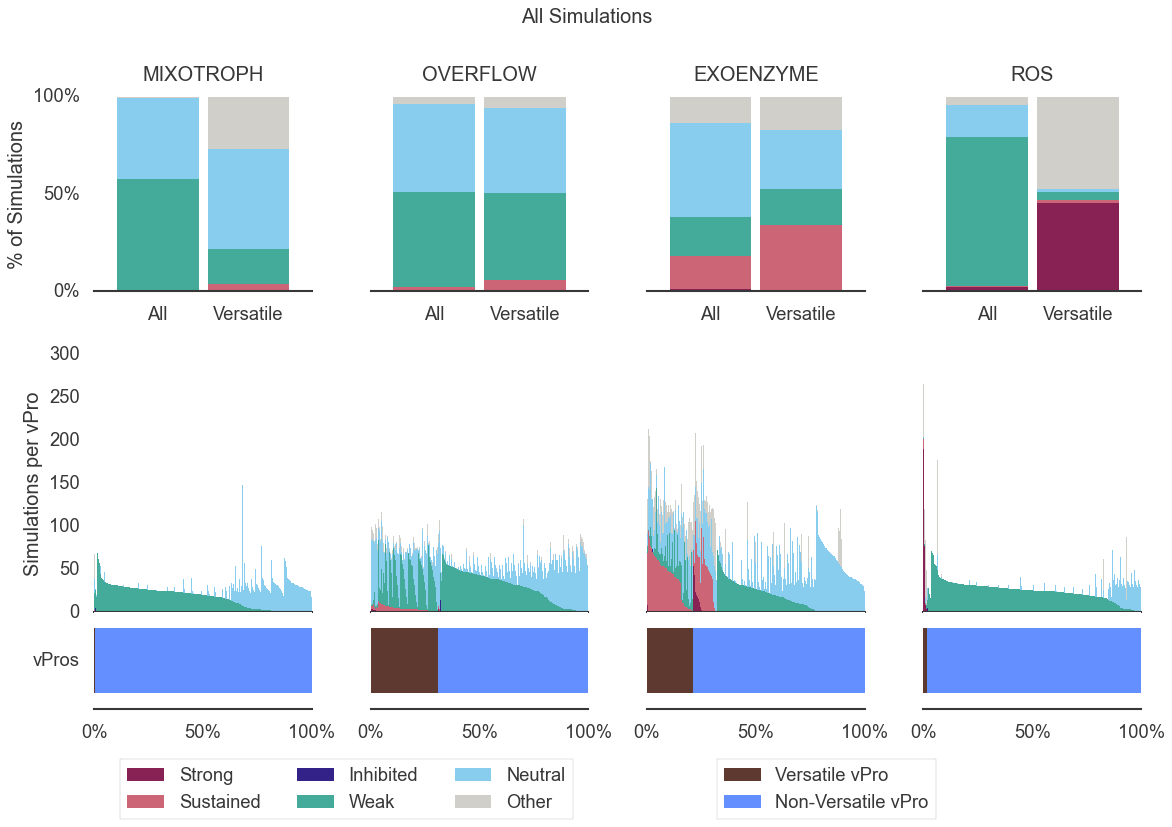

In [96]:
sns.set_context('talk')
fig, axes = plt.subplots(3,4, figsize=(15,9), sharey='row', sharex=False, height_ratios=[2,2, 1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[1,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init', 'extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
               rasterized=True,
             lw=0, ax=ax,) #fontsize=50)
        ax.xaxis.tick_top()
        ax.set(xticks=[], ylabel='Simulations per vPro', xlabel=''
                    )
        #ax.spines.bottom.set_visible(False) 
        #ax.axis["top"].set_visible(False)
        ax = axes[2,i1]

        t = newcdf.loc[newcdf.model.isin([m1]) & newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=1,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        ax = axes[0,i1]
        t = newcdf.loc[newcdf.model.isin([m1]) & ~newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', 
            # figsize=(2,2), 
            legend=False, ax=ax, yticks=(0,50,100,), ylabel='% of Simulations'
        )
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.set(title=m1)
        ax.set_title(m1, pad=15)
#axes[0,0].set()
#axes[2,1].set_title('Simulation Outcomes')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend_dict = dict(zip(labels, lines))
lines_g = [legend_dict[c] for c in gorder]
lines_v = [legend_dict[c] for c in vorder1]


sns.despine()
    
leg1 = fig.legend(lines_g, gorder, loc='lower center', ncol=3  ,  bbox_to_anchor=(0.3, -0.09))# , frameon=False)
leg2 = fig.legend(lines_v, vorder1_labels, loc='lower center', ncol=1  ,  bbox_to_anchor=(0.7, -0.09))# , frameon=False)
leg1.get_frame().set_linewidth(0.2)
leg2.get_frame().set_linewidth(0.2)
leg1.get_frame().set_edgecolor("grey")
leg2.get_frame().set_edgecolor("grey")
plt.tight_layout()
for i in range(len(morder)):
    bbox0 = axes[1,i].get_position(original=True)  
    bbox1 = axes[2,i].get_position(original=True)  
    bbox0.y0 = bbox1.y1
    axes[1,i].set_position(bbox0, which='both')
plt.suptitle('All Simulations', y=1.05)
sns.despine(left=True)
save_fpath = os.path.join(save_dpath, 'fig2_all_simulations.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)    

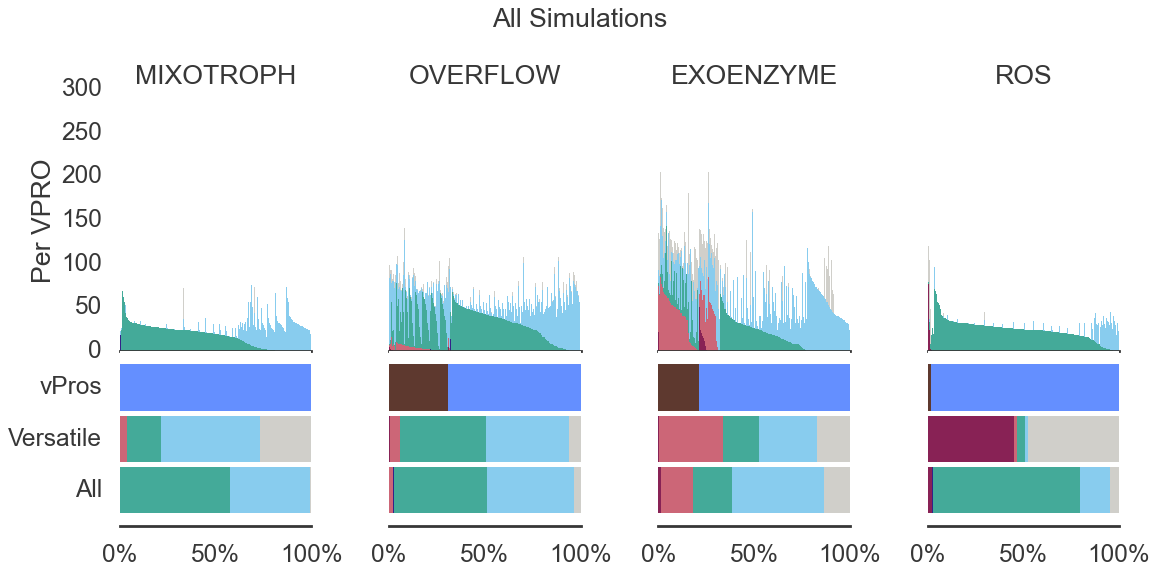

In [97]:
sns.set_context('poster')
fig, axes = plt.subplots(2,4, figsize=(15,7), sharey='row',  height_ratios=[1.5,1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[0,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init', 'extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=ax,) #fontsize=50)
        ax.set(xticklabels=[], ylabel='Per VPRO', xlabel=''
                    )
        ax.set(title=m1)
        ax.spines.bottom.set_visible(False) 
        #ax.axis["bottom"].set_visible(False)
        ax = axes[1,i1]

        t = newcdf.loc[newcdf.model.isin([m1])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.subplots_adjust(hspace=0)
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
plt.suptitle('All Simulations', y=1.05)
sns.despine(left=True)


In [98]:
vpro_df.loc[
    vpro_df.Versatile_STR.isin(['Versatile VPRO']) &
    #vpro_df.Inhibited.ge(1) & 
    vpro_df.Other.le(10) & 
    vpro_df.Strong.ge(3) & 
    vpro_df.Weak.ge(3) & 
    vpro_df.Sustained.ge(3) 
].sort_values(by=['% positive', 'neg_interaction']) # .VPRO.unique()#[gorder]

,model,Phase,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,...,Versatile,simulations_per_VPRO,Versatile_STR,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS,% positive,Versatile_STR_
7220,OVERFLOW,extend,vpro_3_46_74_OVERFLOW_C2__63_OVERFLOW,0,75,5.0,3.0,5.0,5,8,...,True,93.0,Versatile VPRO,O,False,True,False,False,0.086022,Versatile VPRO
6665,OVERFLOW,add,vpro_2_68_32_OVERFLOW_18,0,69,8.0,5.0,3.0,4,8,...,True,89.0,Versatile VPRO,O,False,True,False,False,0.089888,Versatile VPRO
6358,OVERFLOW,add,vpro_2_22_11_OVERFLOW_98,0,76,5.0,3.0,7.0,6,10,...,True,97.0,Versatile VPRO,O,False,True,False,False,0.103093,Versatile VPRO
6624,OVERFLOW,add,vpro_2_58_32_OVERFLOW_86,0,67,10.0,6.0,6.0,13,12,...,True,102.0,Versatile VPRO,O,False,True,False,False,0.117647,Versatile VPRO
10589,OVERFLOW-MIXOTROPH,extend,vpro_3_17_13_OVERFLOW-MIXOTROPH__54_OVERFLOW-M...,0,55,6.0,3.0,10.0,10,13,...,True,84.0,Versatile VPRO,OM,True,True,False,False,0.154762,Versatile VPRO


In [99]:
example_vpro = 'vpro_3_14_37_OVERFLOW-ROS-EXOENZYME__40_OVERFLOW-ROS-EXOENZYME'
example_vpro = 'vpro_19_33_ROS_C0_1023'
example_vpro = 'vpro_2_58_32_OVERFLOW_86'


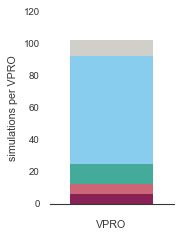

In [100]:
sns.set_context('paper')
fig, ax = plt.subplots(1,1, figsize=(2,3), sharey=True)# , sharey=True)
tmpdf =vpro_df.loc[vpro_df.VPRO.isin([example_vpro])] #.sample(300) # .head(500)
#tmpdf.index = tmpdf.VPRO
tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+gorder, ascending=False)
t=tmpdf[gorder]
#t = t.sort_values(by=gorder, ascending=False)

#_wedges, labels, percentages = 
t.plot(kind='bar', stacked=True, legend=False,
     rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
     lw=0, ax=ax,) #fontsize=50)
ax.set(xticklabels=[], ylabel='simulations per VPRO', xlabel='VPRO'
            )
#ax.set(title=m1)
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
sns.despine(left=True)

In [101]:
vpro_df.columns

Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
       'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
       'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'MIXOTROPH',
       'OVERFLOW', 'EXOENZYME', 'ROS', '% positive', 'Versatile_STR_'],
      dtype='object')

In [102]:
gorder1 = gorder[0:4]
gpalette1 = gpalette[0:4]

gorder1

['Strong', 'Sustained', 'Inhibited', 'Weak']

In [103]:
for i in gorder1:
    vpro_df[f'% {i}'] = vpro_df[i].div(vpro_df[gorder].sum(axis=1))*100

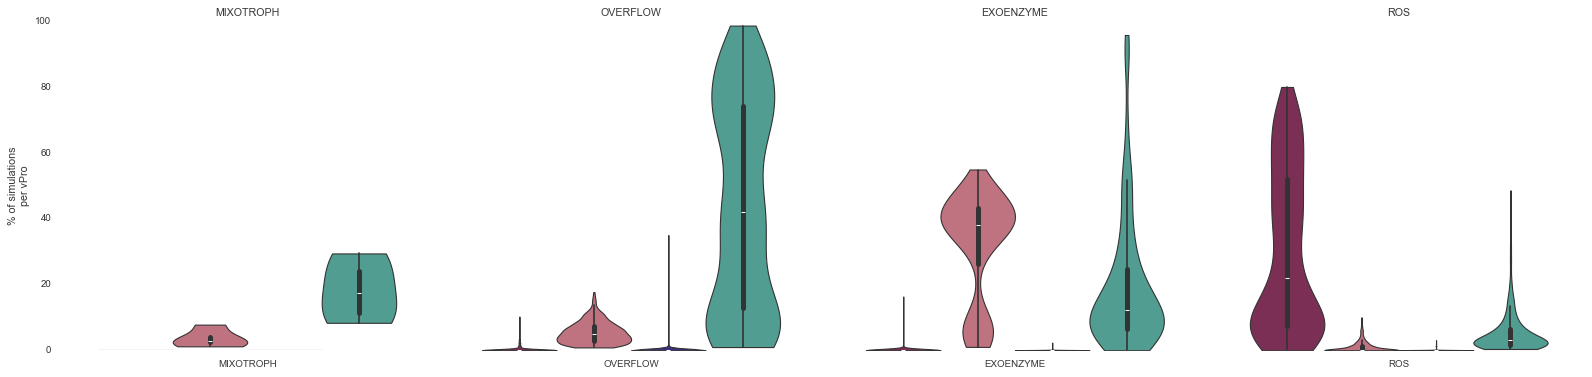

In [104]:
ylabel='% of simulations\nper vPro'
data = vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile
    ].melt(
        id_vars=['VPRO', 'model'], 
        value_vars=[f'% {i}' for i in gorder1],
        value_name=ylabel,
        var_name='y_pred'
    )
data['y_pred'] = data['y_pred'].map({f'% {i}':i for i in gorder1})

sns.catplot(
    data=data,
    col='model', col_order=morder, 
    x='model', sharex=False,#dodge=False,
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    y=ylabel,
    kind='violin', cut=0,
    legend=False,
).set_titles(col_template='{col_name}').set(xlabel='')
sns.despine(bottom=True, left=True)

In [105]:
data

,VPRO,model,y_pred,% of simulations\nper vPro
0,vpro_11_62_EXOENZYME_C1_20,EXOENZYME,Strong,0.000000
1,vpro_11_62_EXOENZYME_C1_46,EXOENZYME,Strong,0.000000
2,vpro_11_62_EXOENZYME_C1_54,EXOENZYME,Strong,0.000000
3,vpro_11_62_EXOENZYME_C1_70,EXOENZYME,Strong,0.000000
4,vpro_11_62_EXOENZYME_C1_98,EXOENZYME,Strong,0.000000
...,...,...,...,...
5071,vpro_2_19_33_ROS_C0_962_85_ROS,ROS,Weak,10.975610
5072,vpro_2_19_33_ROS_C0_962_9_ROS,ROS,Weak,7.042254
5073,vpro_2_19_33_ROS_C0_980_17_ROS,ROS,Weak,13.333333
5074,vpro_2_19_33_ROS_C0_980_32_ROS,ROS,Weak,7.894737


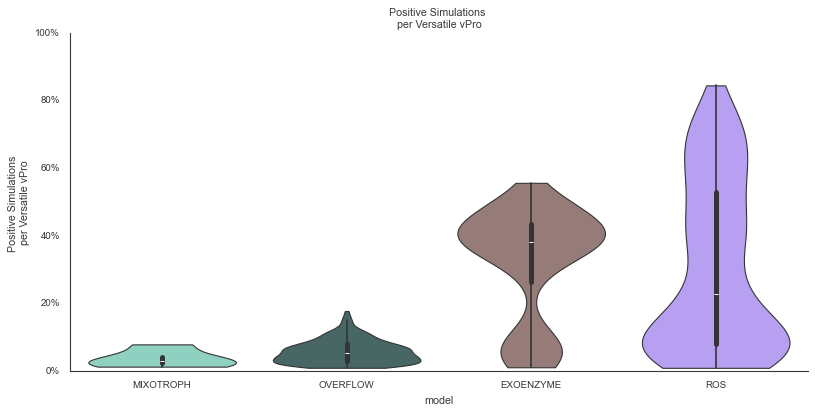

In [106]:
import matplotlib.ticker as mtick

g = sns.catplot(
    data=vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile],
    x='model', order=morder, 
    hue='model', hue_order=morder, palette=mpalette,
    y='% positive',
    kind='violin', cut=0,
    aspect=2,
)
g.set(ylabel='Positive Simulations \nper Versatile vPro', ylim=(0,1), title='Positive Simulations \nper Versatile vPro',)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))


In [109]:
vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile & vpro_df.Phase.isin(['init', 'extend'])].groupby('model')['% positive'].agg(['mean', 'std'])

,mean,std
model,,
EXOENZYME,0.325533,0.168378
MIXOTROPH,0.036718,0.028489
OVERFLOW,0.055223,0.032956
ROS,0.371830,0.280618


In [110]:
vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile & vpro_df.Phase.isin(['init', ])].groupby('model')['% positive'].agg(['mean', 'std'])


,mean,std
model,,
EXOENZYME,0.342716,0.147140
OVERFLOW,0.069084,0.043668
ROS,0.758491,NaN


In [111]:
vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile ].groupby('model')['% positive'].agg(['mean', 'std'])


,mean,std
model,,
EXOENZYME,0.323363,0.161613
MIXOTROPH,0.036718,0.028489
OVERFLOW,0.057428,0.034259
ROS,0.308737,0.250963
